In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
##starting with logistic regression
from sklearn.linear_model import LogisticRegression

df=pd.read_csv("../data/Trained_selected_features.csv")
X_train=df.drop("target",axis=1)
y_train=df["target"]
y_train.value_counts()

target
0    123
1     99
Name: count, dtype: int64

In [193]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # regularization strength
    'penalty': ['l1', 'l2'],              # type of penalty
    'solver': ['liblinear', 'saga']       # solvers that support l1/l2
}

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='recall',       
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.7573684210526316


In [195]:
log_reg = LogisticRegression(max_iter=1000,C=0.01,penalty='l2',solver='liblinear',class_weight='balanced')

# Evaluate multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

# Print average of each metric
print("Mean Accuracy:", results['test_accuracy'].mean())
print("Mean Precision:", results['test_precision'].mean())
print("Mean Recall:", results['test_recall'].mean())
print("Mean F1-Score:", results['test_f1'].mean())

Mean Accuracy: 0.697979797979798
Mean Precision: 0.6142328042328042
Mean Recall: 0.8784210526315789
Mean F1-Score: 0.7223072803589521


In [196]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform  # for sampling float ranges

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Define the hyperparameter space
param_dist = {
    'C': loguniform(0.001, 100),  # random float between 0.001 and 100
    'penalty': ['l1', 'l2']
}

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,             
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

Best Parameters: {'C': 0.008263688714158009, 'penalty': 'l2'}
Best Recall Score: 0.7878947368421052


In [197]:
log_reg = LogisticRegression(C= 0.008263688714158009, max_iter=1000, penalty='l2', solver='liblinear')

# Evaluate multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

# Print average of each metric
print("Mean Accuracy:", results['test_accuracy'].mean())
print("Mean Precision:", results['test_precision'].mean())
print("Mean Recall:", results['test_recall'].mean())
print("Mean F1-Score:", results['test_f1'].mean())

Mean Accuracy: 0.6932323232323233
Mean Precision: 0.6272732919254658
Mean Recall: 0.7878947368421052
Mean F1-Score: 0.6973048645784916


In [198]:
log_reg = LogisticRegression(C= 0.008263688714158009, max_iter=1000, penalty='l2', solver='liblinear')

# Evaluate multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

# Print average of each metric
print("Mean Accuracy:", results['test_accuracy'].mean())
print("Mean Precision:", results['test_precision'].mean())
print("Mean Recall:", results['test_recall'].mean())
print("Mean F1-Score:", results['test_f1'].mean())

Mean Accuracy: 0.6932323232323233
Mean Precision: 0.6272732919254658
Mean Recall: 0.7878947368421052
Mean F1-Score: 0.6973048645784916


In [199]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Cross-Validated Recall:", grid.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validated Recall: 0.7473684210526316


c:\Users\ahmed\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [200]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


svm = SVC()

# Parameter distribution for Randomized Search
param_dist = {
    'C': loguniform(1e-3, 1e3),         
    'gamma': loguniform(1e-4, 1e1),   
    'kernel': ['rbf', 'poly', 'sigmoid']  
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    scoring='recall',
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best results
print("Best Params:", random_search.best_params_)
print("Best Cross-Validated Recall:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'C': 0.19713872690045356, 'gamma': 8.24431219090507, 'kernel': 'rbf'}
Best Cross-Validated Recall: 0.7684210526315789


In [201]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
import numpy as np

# Define the best SVM model
best_svm = SVC(
    C=0.19713872690045356,
    gamma=8.24431219090507,
    kernel='rbf',
    class_weight='balanced'
)

# Perform cross-validation with multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(
    best_svm,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

# Print average scores across folds
print("Mean Accuracy:  {:.4f}".format(np.mean(cv_results['test_accuracy'])))
print("Mean Precision: {:.4f}".format(np.mean(cv_results['test_precision'])))
print("Mean Recall:    {:.4f}".format(np.mean(cv_results['test_recall'])))
print("Mean F1 Score:  {:.4f}".format(np.mean(cv_results['test_f1'])))



Mean Accuracy:  0.7748
Mean Precision: 0.7440
Mean Recall:    0.7884
Mean F1 Score:  0.7588


In [202]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),         
    'max_depth': randint(3, 10),               
    'learning_rate': uniform(0.01, 0.3),      
    'subsample': uniform(0.7, 0.3),            
    'colsample_bytree': uniform(0.7, 0.3),    
    'gamma': uniform(0, 5),                    
}

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=300,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search_xgb.fit(X_train, y_train)

# Show best parameters and recall score
print("Best XGBoost Params:", random_search_xgb.best_params_)
print("Best Cross-Validated Recall (XGBoost):", random_search_xgb.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\ahmed\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:27:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'colsample_bytree': 0.937216949451689, 'gamma': 1.5937625146603496, 'learning_rate': 0.19776741293110273, 'max_depth': 7, 'n_estimators': 157, 'subsample': 0.7698878424260901}
Best Cross-Validated Recall (XGBoost): 0.7573684210526316


In [208]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
import pandas as pd

# Load test and train data
test = pd.read_csv('../data/Test_selected_features.csv')
X_test = test.drop('target', axis=1)
y_test = test['target']

df = pd.read_csv('../data/Trained_selected_features.csv')
X_train = df.drop('target', axis=1)
y_train = df['target']

# Define the best SVM model
best_svm = SVC(
    C=0.19713872690045356,
    gamma=8.24431219090507,
    kernel='rbf',
    class_weight='balanced'
)

# Fit the model
best_svm.fit(X_train, y_train)
# Predict on test set
y_pred = best_svm.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8666666666666667
✅ Precision: 0.8333333333333334
✅ Recall: 0.8928571428571429
✅ F1 Score: 0.8620689655172413

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.83      0.89      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

🧱 Confusion Matrix:
 [[27  5]
 [ 3 25]]


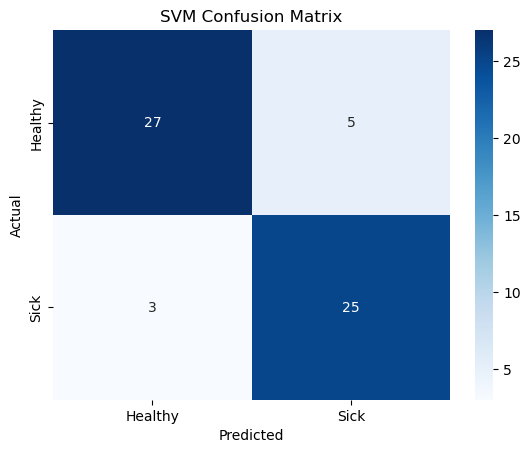

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Sick'], yticklabels=['Healthy', 'Sick'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [210]:
import joblib
joblib.dump(best_svm, '../models/svm_heart_model.pkl')

['../models/svm_heart_model.pkl']